In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# 1. Load the dataset
economic_index = pd.read_csv('economic_index.csv')

In [81]:
# Look at first 5 rows to verify data
display(economic_index.head())

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [82]:
## Drop unneccessary columns 

economic_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [83]:
# Look at first 5 rows to verify data
display(economic_index.head())

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [84]:
economic_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

[]

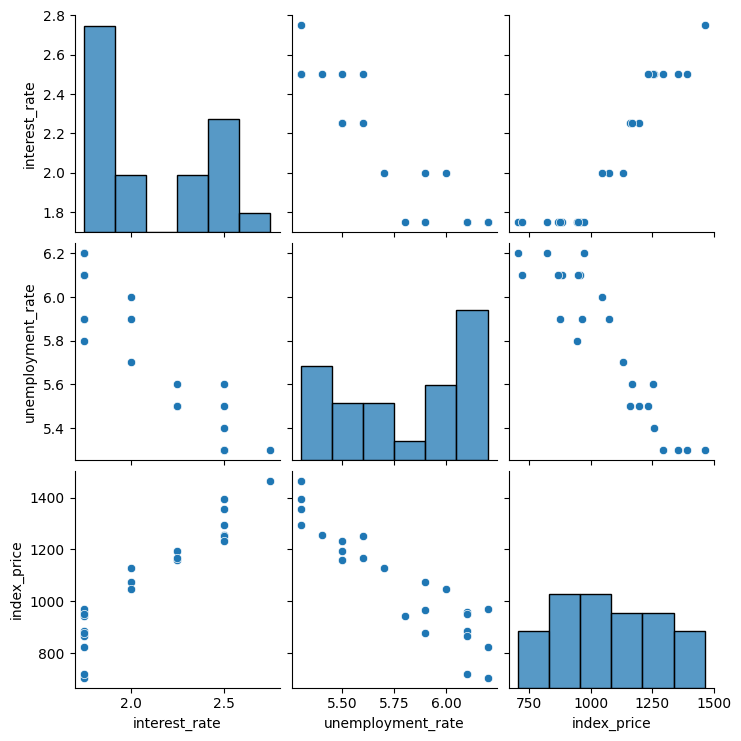

In [85]:
## Lets do some visualization 
import seaborn as sns
sns.pairplot(economic_index)
plt.plot()

In [86]:
economic_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


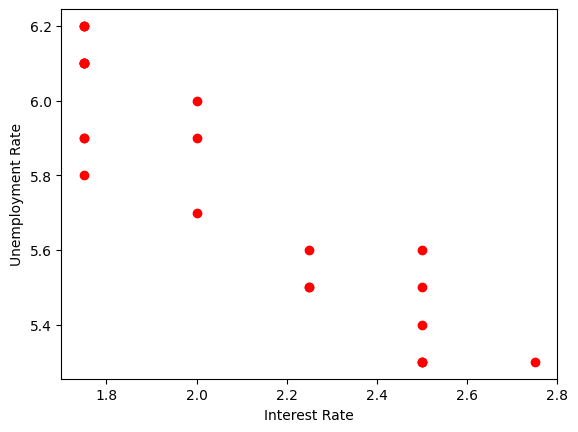

In [87]:
## Visualize the data points more closely

plt.scatter(economic_index['interest_rate'], economic_index['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [88]:
## Independent and dependent feature

X = economic_index.iloc[:, :-1]
y = economic_index.iloc[:, -1]

In [89]:
display(X)

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [90]:
# =====================
# Train–Test Split
# =====================
from sklearn.model_selection import train_test_split

# Split data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (18, 2)
Shape of X_test: (6, 2)
Shape of y_train: (18,)
Shape of y_test: (6,)


[]

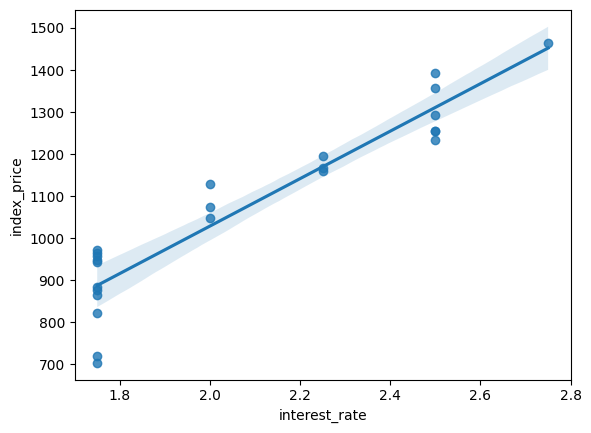

In [91]:
sns.regplot(x='interest_rate', y='index_price', data=economic_index)
plt.plot()

[]

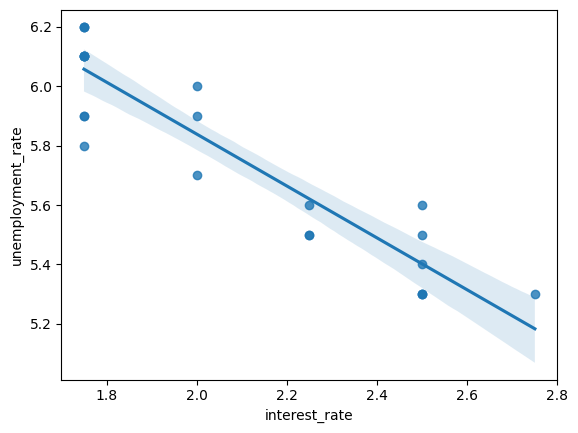

In [92]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=economic_index)
plt.plot()

[]

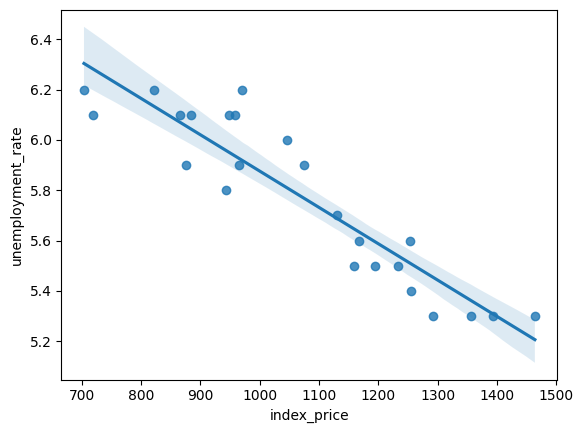

In [93]:
sns.regplot(x='index_price', y='unemployment_rate', data=economic_index)
plt.plot()

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train, transform train
X_test_scaled = scaler.transform(X_test)         # transform test with same params

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
## Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3)

In [97]:
np.mean(validation_score) # get mean mse

np.float64(-5914.8281801623925)

In [98]:
## Prediction
y_pred = model.predict(X_test_scaled)

# ==========================
# Performance Metrics
# ==========================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

R² Score: 0.8279
MSE : 5793.7629
MAE : 59.9358
RMSE : 76.1168


In [99]:
# ==========================
# Adjusted R²
# ==========================
# n = number of samples in test set
# p = number of predictors (here p = 1)
n = len(y_test)
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2:.4f}")

Adjusted R²: 0.7132


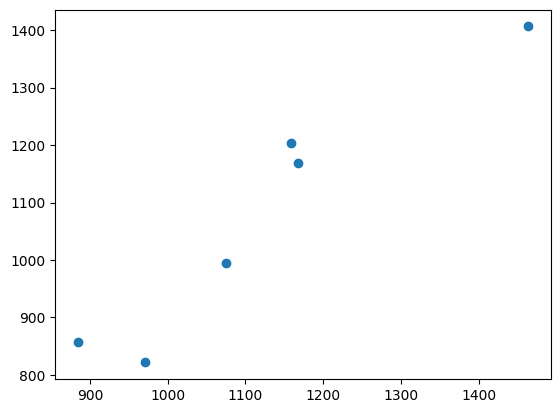

In [101]:
## Assumption 

# 1) plot scatter 
plt.scatter(y_test, y_pred)
plt.show()

In [102]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


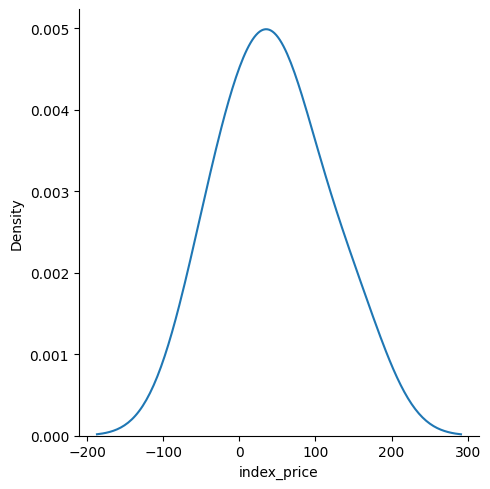

In [103]:
# Plot residuals
sns.displot(residuals, kind='kde')
plt.show()

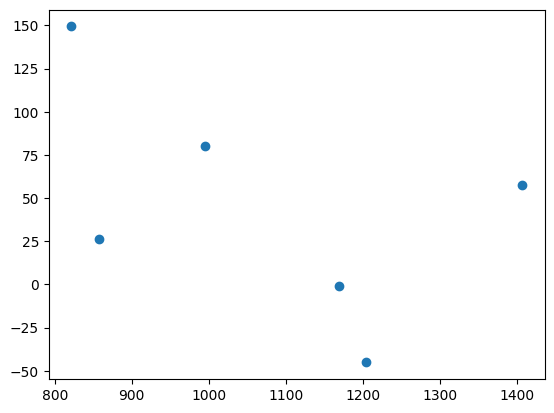

In [104]:
## Create a scatter plot wrt predication and residuals 

plt.scatter(y_pred, residuals)
plt.show()

In [105]:
# ==========================
# OLS Linear Regression with statsmodels
# ==========================
import statsmodels.api as sm

# statsmodels does NOT add intercept by default, so add constant manually
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)

ols_model = sm.OLS(y_train, X_train_ols).fit()
ols_predictions = ols_model.predict(X_test_ols)

# Detailed statistical summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           2.50e-08
Time:                        21:36:26   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.4444     16.941     62.183      0.0